<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [387]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

In [496]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432
connection = connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT)

In [495]:
def df(query):
    connection = connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)
    df = pd.read_sql_query(query, connection)
    display(df)


# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [390]:
# текст запроса
query_3_1 = f'''
select count(id)
from public.vacancies
'''

In [391]:
vac_count = df(query_3_1)
#49197

,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [383]:
# текст запроса
query_3_2 = f'''
select count(id)
from public.employers
'''

In [392]:
# результат запроса
emp_count = df(query_3_2)
#23501

,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [385]:
# текст запроса
query_3_3 = f'''
select count(id)
from public.areas
'''

In [393]:
# результат запроса
area_count = df(query_3_3)
#1362

,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [30]:
# текст запроса
query_3_4 = f'''
select count(id)
from public.industries
'''

In [395]:
# результат запроса
ind_count = df(query_3_4)
#294

,count
0,294


***

Выводы по предварительному анализу данных.

В данных таблиц содержится информация о 49197 вакансиях, которые предлагают 23501 работодатель из 1362 регионов по 294 сферам деятельности. Это говорит нам о том, что у работодателей может быть более одной вакансии.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [396]:
# текст запроса
query_4_1 = '''
select 
    count(v.id),
    a.name area_name
from public.vacancies v
    join public.areas a on a.id = v.area_id
group by 2
order by 1 desc
limit 5
'''

In [397]:
# результат запроса
df_4_1 = df(query_4_1)

,count,area_name
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [398]:
# текст запроса
query_4_2 = '''
select count(id)
from public.vacancies
where salary_from is not null
or salary_to is not null
'''

In [399]:
# результат запроса
df_4_2 = df(query_4_2)
print(24037/49197)

,count
0,24073


0.4885867024412058


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [400]:
# текст запроса
query_4_3 = '''
select 
    round(avg(salary_from)),
    round(avg(salary_to))
from public.vacancies
'''

In [401]:
# результат запроса
df_4_3 = df(query_4_3)

,round,round
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [402]:
# текст запроса
query_4_4 = '''
select 
    count(id),
    schedule,
    employment
from public.vacancies
group by 2,3
order by 1 desc
offset 1 limit 1
'''

In [403]:
# результат запроса
df_4_4=df(query_4_4)

,count,schedule,employment
0,7802,Удаленная работа,Полная занятость


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [404]:
# текст запроса
query_4_5 = '''
select 
    experience,
    count(id)
from public.vacancies
group by 1
order by 2
'''

In [405]:
# результат запроса
df_4_5 = df(query_4_5)

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

Выводы по детальному анализу вакансий.
1. Больше всего вакансий в мегаполисах Москва, СПб
2. Из всех выставленных вакансий графа с зп заполнена лишь у половины
3. Средняя з/п варьируется от 71065 до 110537
4. Существует практически 8 тысяч вакансий с удаленной работой по полному рабочему дню
5. В основном требуются работники с опытом от 1 года до 3 лет

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [406]:
# текст запроса
query_5_1 = '''
select 
    count(v.id) vac_count,
    e.name emp
from 
    public.vacancies v
    join public.employers e on e.id = v.employer_id
group by 2
order by 1 desc
limit 5
'''

In [436]:
# результат запроса
df_5_1 = df(query_5_1)

,vac_count,emp
0,1933,Яндекс
1,491,Ростелеком
2,444,Тинькофф
3,428,СБЕР
4,331,Газпром нефть


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [408]:
# текст запроса
query_5_2 = '''
select
    a.name area,
    count(distinct e.id) emp_count,
    count(distinct v.id) vac_count
from 
    public.areas a
    left join public.employers e on a.id = e.area
    left join public.vacancies v on a.id = v.area_id
where v.name is null
group by 1
order by 2 desc
limit 1
'''

In [409]:
# результат запроса
df_5_2 = df(query_5_2)

,area,emp_count,vac_count
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [410]:
# текст запроса
query_5_3 = '''
select
    e.id emp_id,
    e.name,
    count(distinct v.area_id)
from
    employers e
    left join vacancies v on e.id = v.employer_id
group by 1
order by 3 desc
limit 1
'''

In [411]:
# результат запроса
df_5_3 = df(query_5_3)

,emp_id,name,count
0,1740,Яндекс,181


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [412]:
# текст запроса
query_5_4 = '''
select
    count(e.name)
from 
    employers e
    left join employers_industries ei on e.id = ei.employer_id
where ei.employer_id is null
'''

In [413]:
# результат запроса
df_5_4 = df(query_5_4)

,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [414]:
# текст запроса
query_5_5 = '''
select 
    e.name,
    count(ei.industry_id)
from 
    employers e
    join employers_industries ei on e.id = ei.employer_id
group by 1
having count(ei.industry_id) = 4
order by 1
offset 2 limit 1
'''

In [415]:
# результат запроса
df_5_5 = df(query_5_5)

,name,count
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [416]:
# текст запроса
query_5_6 = '''
select 
    i.name,
    count(ei.employer_id)
from 
    industries i
    join employers_industries ei on i.id = ei.industry_id
where i.name = 'Разработка программного обеспечения'
group by 1
'''

In [417]:
# результат запроса
df_5_6 = df(query_5_6)

,name,count
0,Разработка программного обеспечения,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [418]:
# код для получения списка городов-милионников
import requests
from bs4 import BeautifulSoup 
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'lxml')
table = soup.find('table', class_='standard')
#for j in table1.find_all('tr'):
#    row_data = j.find_all('a')[:1]
#    row = [i.text for i in row_data]
#    cities_list.append(str(row))
#cities_list = tuple(cities_list[1:])
result = []
allrows = table.tbody.findAll('tr')
for row in allrows:
    result.append([])
    allcols = row.findAll('a')
    for col in allcols:
        thestrings = [s for s in col.findAll(text=True)]
        thetext = ''.join(thestrings)
        result[-1].append(thetext)
result = result[1:]
str_result = []
for i in result:
    i = str(i)
    i=i.translate({ord(x): None for x in "''[]"})
    str_result.append(i)
str_result.append(str_result[-3].translate({ord(x): None for x in " , a"}))

str_result.remove('Воронеж, a')
city = tuple(str_result)
city

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Челябинск',
 'Красноярск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Омск',
 'Краснодар',
 'Пермь',
 'Волгоград',
 'Воронеж')

In [419]:
# текст запроса
query_5_7 = f'''
select
    a.name area_name,
    count(v.id) vac_count
from
    vacancies v
    join employers e on e.id = v.employer_id and e.name = 'Яндекс'
    join areas a on a.id = v.area_id and (a.name in {city})
group by 1
union all
select
    'total',
    count(v.id) vac_count
from
    vacancies v
    join employers e on e.id = v.employer_id and e.name = 'Яндекс'
    join areas a on a.id = v.area_id and (a.name in {city})
'''

In [420]:
# результат запроса
df_5_7 = df(query_5_7)

,area_name,vac_count
0,total,485
1,Волгоград,24
2,Воронеж,32
3,Екатеринбург,39
4,Казань,25
5,Краснодар,30
6,Красноярск,23
7,Москва,54
8,Нижний Новгород,36
9,Новосибирск,35


***

Выводы по анализу работодателей:
1. Крупнейшим работодателем на рынке является Яндекс
2. Некоторые работодатели указывают регион как Россия
3. Яндекс так же имеет самый обширный обхват по регионам
4. Сферы деятельности не указаны у более чем 8 тысяч работодателей
5. 2ГИС имеет ванасии по 4 сферам деятельности
6. Более 3.5 тысяч работодателей занимаются разработкой ПО
7. В крупнейших городах Яндекс имеет 485 вакансий


# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [421]:
# текст запроса
query_6_1 = '''
select
    count(v.name)
from
    vacancies v
where lower(v.name) like '%data%' 
    or lower(v.name) like '%данн%'
'''

In [422]:
# результат запроса
df_6_1 = df(query_6_1)

,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [423]:
# текст запроса
query_6_2 = f'''
select
    count(v.name)
from 
    vacancies v
where (lower(v.name) like '%data%scientist%'
    or lower(v.name) like '%data%science%'
    or lower(v.name) like '%исследователь%данных%'
    or (v.name like '%ML%' and v.name not like '%HTML%')
    or lower(v.name) like '%machine%learning%'
    or lower(v.name) like '%машинн%обучен%')
    and (lower(v.experience) like '%нет опыта%' 
    or lower(v.employment) like '%стажировка%'
    or lower(v.name) like '%junior%')
'''

In [424]:
# результат запроса
df_6_2 = df(query_6_2)

,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [425]:
# текст запроса
query_6_3 = '''
select
    count(v.name)
from 
    vacancies v
where (lower(v.name) like '%data%scientist%'
    or lower(v.name) like '%data%science%'
    or lower(v.name) like '%исследователь%данных%'
    or (v.name like '%ML%'
    and v.name not like '%HTML%')
    or lower(v.name) like '%machine%learning%'
    or lower(v.name) like '%машинн%обучен%')
    and (lower(v.key_skills) like '%sql%'
    or lower(v.key_skills) like '%postgres%')
'''

In [426]:
# результат запроса
df_6_3 = df(query_6_3)

,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [427]:
# текст запроса
query_6_4 = '''
select
    count(v.name)
from 
    vacancies v
where (lower(v.name) like '%data%scientist%'
    or lower(v.name) like '%data%science%'
    or lower(v.name) like '%исследователь%данных%'
    or (v.name like '%ML%'
    and v.name not like '%HTML%')
    or lower(v.name) like '%machine%learning%'
    or lower(v.name) like '%машинн%обучен%')
    and lower(v.key_skills) like '%python%'
'''

In [428]:
# результат запроса
df_6_4 = df(query_6_4)

,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [429]:
# текст запроса
query_6_5 = '''
select
    round(avg(length(v.key_skills) - length(replace(v.key_skills, CHR(9), '')) +1),2)
from
    vacancies v 
where (lower(v.name) like '%data scientist%'
    OR lower (v.name) like '%data science%'
    or lower (v.name) like '%исследователь данных%'
    or (v.name like '%ML%' and v.name not like '%HTML%')
    or lower (v.name) like '%machine learning%'
    or lower (v.name) like '%машинн%обучен%%')
    and v.key_skills is not null
'''

In [430]:
# результат запроса
df_6_5 = df(query_6_5)

,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [431]:
# текст запроса
query_6_6 = '''
select 
    v.experience, 
    round(avg(coalesce((salary_from+salary_to)/2, salary_from, salary_to))) 
from 
    vacancies v
where 
    (lower(v.name) like '%data scientist%'
    or lower(v.name) like '%data science%'
    or lower(v.name) like '%исследователь данных%'
    or (v.name LIKE '%ML%' and v.name not LIKE '%HTML%')
    or lower(v.name) like '%machine learning%'
    or lower(v.name) like '%машинн%обучен%%')
    and v.experience like '%3%6%лет%'
    and (v.salary_from is not null or v.salary_to is not null)
group by 1
'''

In [432]:
# результат запроса
df_6_6 = df(query_6_6)

,experience,round
0,От 3 до 6 лет,243115.0


***

Выводы по предметному анализу:
Относительно общего количества вакансий, вакансий для data science не так уж и много. Из них вакансий для начинающих специалистов еще меньше. ЗП для data science достаточно высокая, но только для людей с большим опытом.

# Общий вывод по проекту

###### 1. Количество вакансий по компаниям

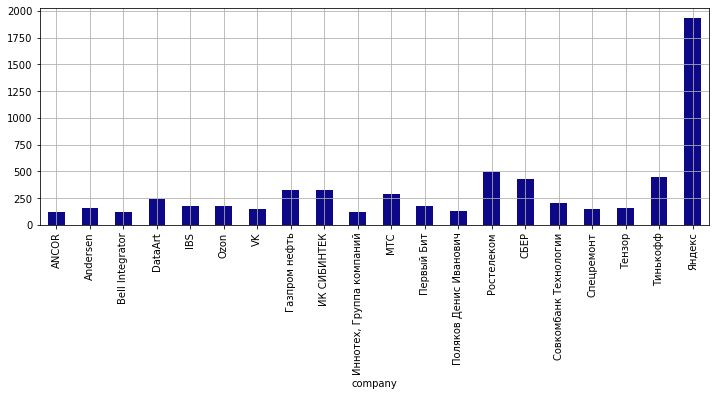

In [468]:
query_7_1 = '''
select 
    e.name Company,
    count(v.id) vac_count
from 
    public.vacancies v
    join public.employers e on e.id = v.employer_id
group by 1
order by 2 desc
limit 20
'''
df_7_1 = pd.read_sql(query_7_1, connection)
df_7_1
grouped_company = df_7_1.groupby('company')['vac_count'].last()
grouped_company.plot(kind='bar',
                    grid=True,
                    figsize=(12,4),
                    colormap='plasma');

Можем увидеть, что самым крупным работодателем в данных является Яндекс, который имеет вакансий на порядок выше, чем остальные компании

###### 2. Средняя з\п по вакансиям

In [474]:
query_7_2 = '''
select 
    v.name,
    v.experience,
    avg(coalesce((salary_from+salary_to)/2, salary_from, salary_to)) avg_salary
from 
    vacancies v
where 
    v.salary_from is not null or v.salary_to is not null
group by 1,2
order by 3 desc
limit 20
'''
df_7_2 = pd.read_sql(query_7_2, connection)
df_7_2

,name,experience,avg_salary
0,Брокер по продаже апартаментов,От 1 года до 3 лет,750000.000000
1,СТО/Директор по разработке,От 3 до 6 лет,750000.000000
2,FullStack Developer in Unicorn Company,От 3 до 6 лет,717000.000000
3,Frontend Developer in Unicorn Company,От 3 до 6 лет,717000.000000
4,1С:Эксперт по производительности 1С,От 3 до 6 лет,650000.000000
5,Руководитель команды разработки,От 3 до 6 лет,600000.000000
6,Senior DevOps in Blockchain Startup,От 3 до 6 лет,587500.000000
7,Senior Software Developer (upwork / иностранны...,От 3 до 6 лет,555261.000000
8,Chief Product Officer (CPO),Более 6 лет,550000.000000
9,"Директор IT (HoReCa, Retail)",Более 6 лет,550000.000000


Здесь мы можем увидеть, что самые высокие зарплаты в основном в области IT, при этом у людей с большим опытом работы

###### 3. Количество вакансий и средняя з\п по городам

<AxesSubplot:xlabel='area_name'>

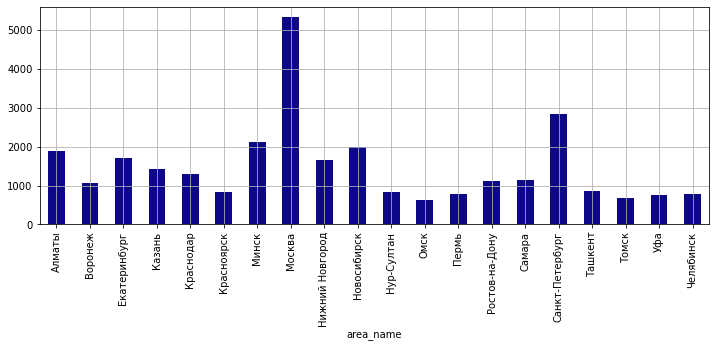

In [500]:
connection = connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT)
query_7_3 = '''
select 
    count(v.id),
    avg(coalesce((v.salary_from+v.salary_to)/2, v.salary_from, v.salary_to)) avg_sal,
    a.name area_name
from public.vacancies v
    join public.areas a on a.id = v.area_id
group by 3
order by 1 desc
limit 20
'''
df_7_3 = pd.read_sql(query_7_3, connection)
grouped_area = df_7_3.groupby('area_name')['count'].last()
grouped_area.plot(kind='bar',
                    grid=True,
                    figsize=(12,4),
                    colormap='plasma')

<AxesSubplot:xlabel='area_name'>

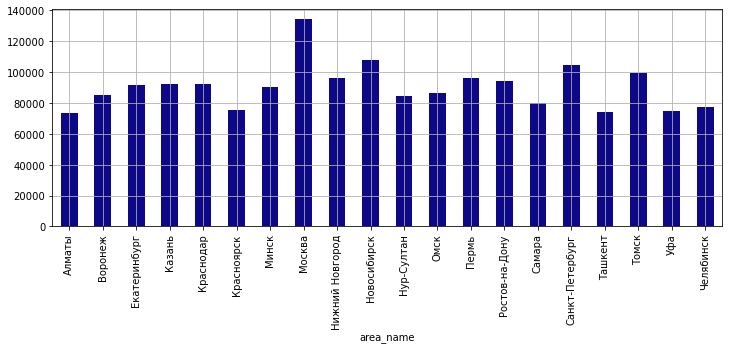

In [499]:
grouped_company = df_7_3.groupby('area_name')['avg_sal'].last()
grouped_company.plot(kind='bar',
                    grid=True,
                    figsize=(12,4),
                    colormap='plasma')

ТОП-20 городов по количеству вакансий

###### 4. Количество вакансий по индустриям

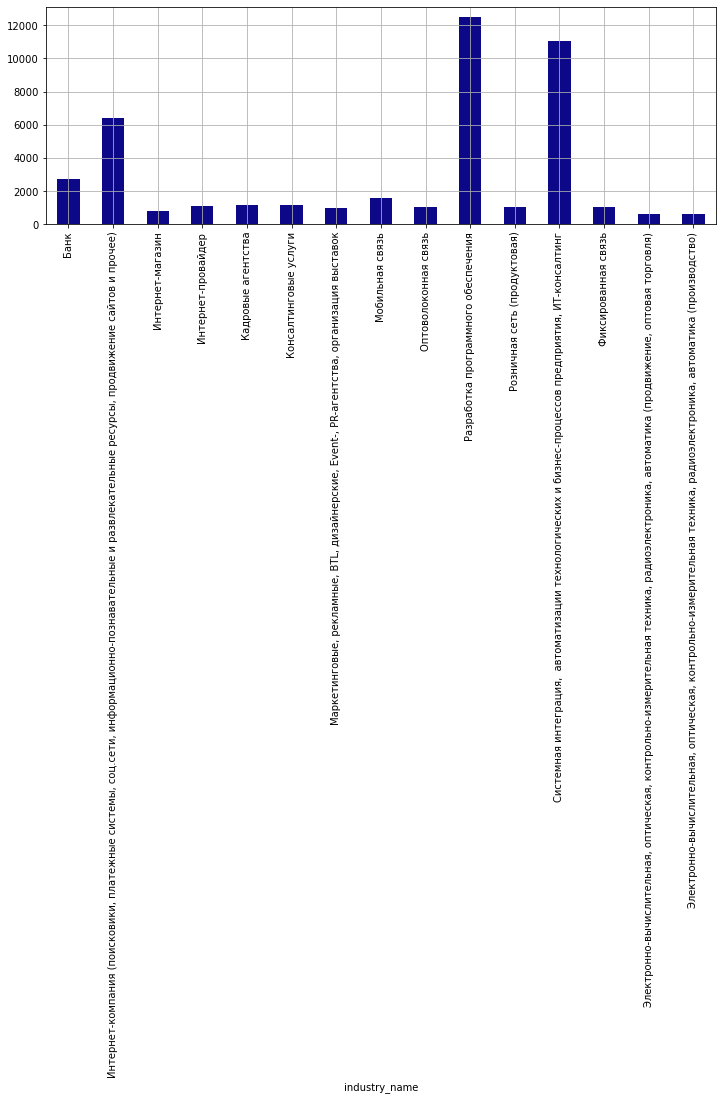

In [483]:
query_7_4 = '''
select 
    i.name industry_name,
    count(v.name) vac_count
from
    vacancies v
    join employers_industries ei on v.employer_id = ei.employer_id
    join industries i on i.id = ei.industry_id
group by 1
order by 2 desc
limit 15
'''
df_7_4 = pd.read_sql(query_7_4, connection)
grouped_company = df_7_4.groupby('industry_name')['vac_count'].last()
grouped_company.plot(kind='bar',
                    grid=True,
                    figsize=(12,4),
                    colormap='plasma');

Можно наблюдать, что большинство индустрий с максимальным количеством вакансий так или иначе связаны с IT

###### 6.Роль опыт у data science

In [484]:
query_7_5 = '''
select 
    v.experience, 
    round(avg(coalesce((salary_from+salary_to)/2, salary_from, salary_to))) 
from 
    vacancies v
where 
    (lower(v.name) like '%data scientist%'
    or lower(v.name) like '%data science%'
    or lower(v.name) like '%исследователь данных%'
    or (v.name LIKE '%ML%' and v.name not LIKE '%HTML%')
    or lower(v.name) like '%machine learning%'
    or lower(v.name) like '%машинн%обучен%%')
    and (v.salary_from is not null or v.salary_to is not null)
group by 1
'''
df_7_5 = df(query_7_5)

,experience,round
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


Видим, что у специалистов по data science координально меняестся средняя з\п при росте опыта

###### Общий вывод:
Из данной работы можно сделать логичный вывод, на данный момент IT индустрий развивается огромными темпами, в связи с чем, в настоящее время требуется много специалистов так или иначе связанных с IT. В IT самые высокие зарплаты, самое большое количество вакансий, основная масса вакансий находится в крупных городах. Так же в крупных городах и самая высокая зарплата. На данный момент вакансий по data science не так уж и много, но тем не менее они уже есть, и на данный момент подходящим людям предлагают вполне конкуретоспособную зарплату.